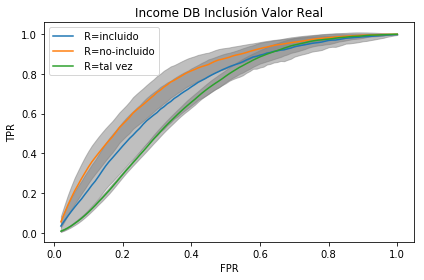

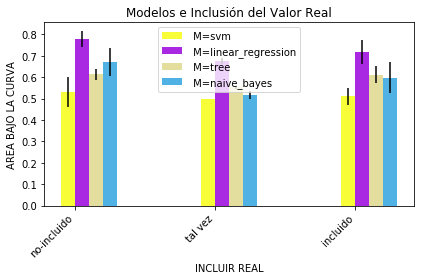

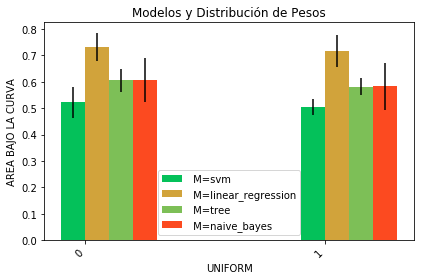

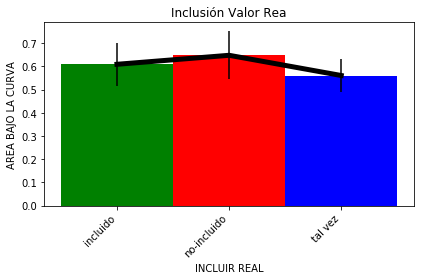

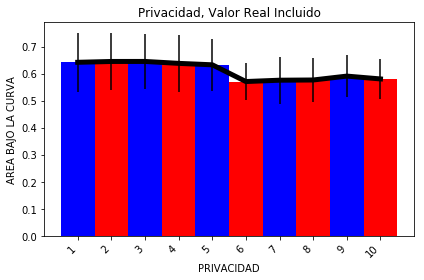

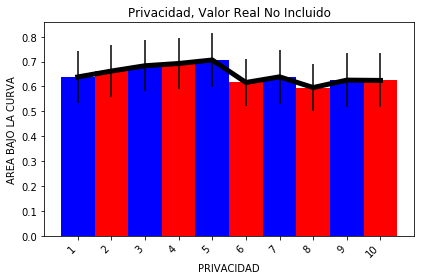

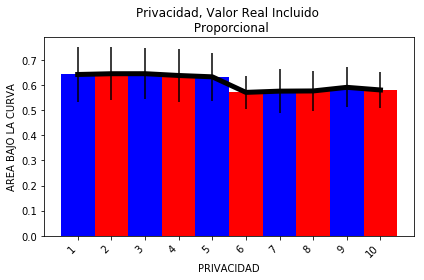

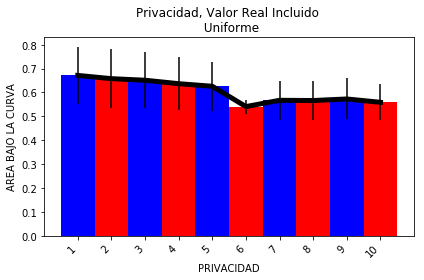

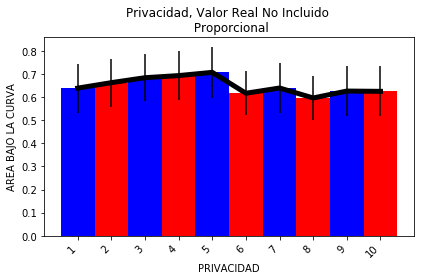

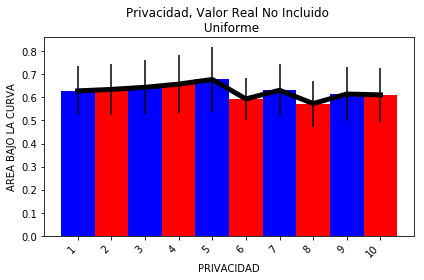

/home/juanzinser/Workspace/Tesis/venv/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


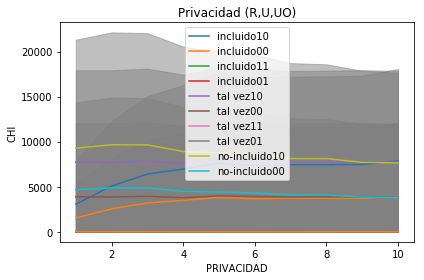

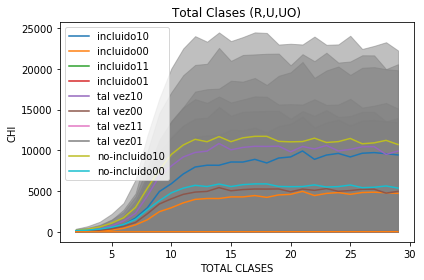

In [4]:
from sanitization_tools import *
supervised_results = pn.read_csv("model_scores_roc.csv")
non_supervised_results = pn.read_csv("rmse_df_simulated_rel.csv")

lang_labels = "spanish"
subfolder= "dataday/"
rocs_by_case(supervised_results, {},{"real":["t","f","m"]}, savefig=True, title="Inclusión Valor Real", save_name=subfolder + "income_roc_privacy_grouped_tmf",language="spanish")


plot_bars(supervised_results.copy(), "real", "auc", {}, 
               {"model":["svm", "linear_regression", "tree", "naive_bayes"]}, savefig=True, 
               title="Modelos e Inclusión del Valor Real", save_name=subfolder + "include_real_model", width_delta=.1, language=lang_labels)

plot_bars(supervised_results.copy(), "uniform", "auc", {}, 
               {"model":["svm", "linear_regression", "tree", "naive_bayes"]}, savefig=True, 
               title="Modelos y Distribución de Pesos", save_name=subfolder + "uniform_model", width_delta=.1, language=lang_labels)


plot_bars_single_chunk(df = supervised_results, gb_param = "real",yaxis = "auc", base_filter = {}, 
                       lines_cases = {"real":["t","f","m"]}, savefig=True, title="Inclusión Valor Rea", 
                       save_name=subfolder + "privacy_is_real", width_delta=.1, language=lang_labels)


plot_bars_single_chunk(df = supervised_results, gb_param = "privacy",yaxis = "auc", base_filter = {"real":"t"}, 
                       lines_cases = {"privacy":[str(i) for i in range(1,11)]}, savefig=True, title="Privacidad, Valor Real Incluido", 
                       save_name=subfolder + "privacy_auc_bar_t", width_delta=.1, language=lang_labels)
plot_bars_single_chunk(df = supervised_results, gb_param = "privacy",yaxis = "auc", base_filter = {"real":"f"}, 
                       lines_cases = {"privacy":[str(i) for i in range(1,11)]}, savefig=True, title="Privacidad, Valor Real No Incluido", 
                       save_name=subfolder + "privacy_auc_bar_f", width_delta=.1, language=lang_labels)
plot_bars_single_chunk(df = supervised_results, gb_param = "privacy",yaxis = "auc", base_filter = {"real":"t", "uniform":0}, 
                       lines_cases = {"privacy":[str(i) for i in range(1,11)]}, savefig=True, title="Privacidad, Valor Real Incluido \n Proporcional", 
                       save_name=subfolder + "privacy_auc_bar_t0", width_delta=.1, language=lang_labels)
plot_bars_single_chunk(df = supervised_results, gb_param = "privacy",yaxis = "auc", base_filter = {"real":"t", "uniform":1}, 
                       lines_cases = {"privacy":[str(i) for i in range(1,11)]}, savefig=True, title="Privacidad, Valor Real Incluido \n Uniforme", 
                       save_name=subfolder + "privacy_auc_bar_t1", width_delta=.1, language=lang_labels)
plot_bars_single_chunk(df = supervised_results, gb_param = "privacy",yaxis = "auc", base_filter = {"real":"f", "uniform":0}, 
                       lines_cases = {"privacy":[str(i) for i in range(1,11)]}, savefig=True, title="Privacidad, Valor Real No Incluido \n Proporcional", 
                       save_name=subfolder + "privacy_auc_bar_f0", width_delta=.1, language=lang_labels)
plot_bars_single_chunk(df = supervised_results, gb_param = "privacy",yaxis = "auc", base_filter = {"real":"f", "uniform":1}, 
                       lines_cases = {"privacy":[str(i) for i in range(1,11)]}, savefig=True, title="Privacidad, Valor Real No Incluido \n Uniforme", 
                       save_name=subfolder + "privacy_auc_bar_f1", width_delta=.1, language=lang_labels)


rmse_auc_plot_with_intervals(non_supervised_results, "privacy", "chi", 
                           ["t", "m", "f"], [None], [None], [0,1], [None],
                            {("uniform","uniform2"):[(1,1),(0,0)]}, savefig=True, 
                           title="Privacidad (R,U,UO)", save_name=subfolder + "privacy", language=lang_labels)
rmse_auc_plot_with_intervals(non_supervised_results, "nclasses", "chi", 
                           ["t", "m", "f"], [None], [None], [0,1], [None],
                            {("uniform","uniform2"):[(1,1),(0,0)]}, savefig=True, 
                           title="Total Clases (R,U,UO)", save_name=subfolder + "nclasses", language=lang_labels)

